### KDE(Kernel Density Estimation)의 이해

**seaborn의 distplot( )을 이용하여 KDE 시각화**  
https://seaborn.pydata.org/tutorial/distributions.html

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


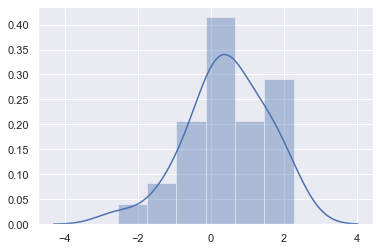

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes = True)

np.random.seed(0)
# 평균이 '0'이고, 표준편차가 '1'인 표준정규분포를 따르는 sample data를 30개 생성
x = np.random.normal(0, 1, size = 30)  
print(x)
sns.distplot(x)

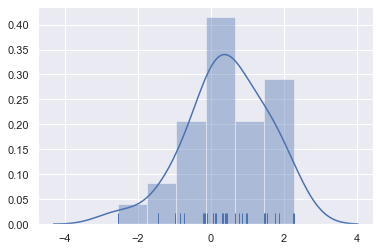

In [2]:
sns.distplot(x, rug = True) # rug = True 로 설정하면, '밀집도'를 확인할 수 있다

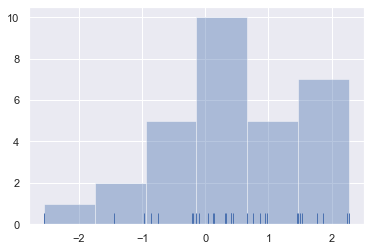

In [3]:
sns.distplot(x, kde = False, rug = True)  # kde = False 로 설정하면, 선 없이 히스토그램만 그려준다

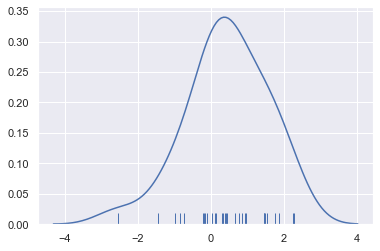

In [4]:
sns.distplot(x, hist = False, rug = True)  # hist = False 로 설정하면, 히스토그램 없이 선만 그려준다

**개별 관측 데이터에 대해 가우시안 커널 함수를 적용**
- rugplot( )은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다

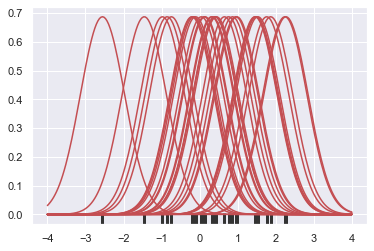

In [5]:
from scipy import stats

# x = np.random.normal(0, 1, size = 30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)   # 최적의 bandwith를 구해주는 식 참조 (교재 p.428 맨 아래 필기)
support = np.linspace(-4, 4, 200)  # np.linspace(시작, 끝(포함), 갯수): 여기서는 -4 부터 4 까지의 값을 200개로 분할

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support) # stats.norm()에서 표준편차로 "bandwith"를 지정
    kernels.append(kernel)
    plt.plot(support, kernel, color = "r")

sns.rugplot(x, color = ".2", linewidth = 3)

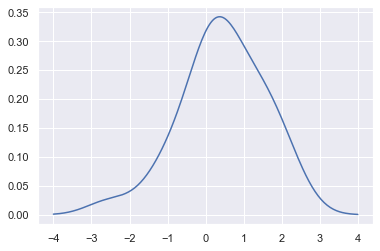

In [6]:
from scipy.integrate import trapz
density = np.sum(kernels, axis = 0)  # 커널 함수를 적용한 값들을 모두 더한 뒤에,
density /= trapz(density, support)   # 데이커 건수로 나눠 확률 밀도 함수를 추정한다
plt.plot(support, density)

**seaborn은 kdeplot()으로 KDE 곡선을 바로 구할 수 있음**
- 위에서 수행한 distplot( )은 과정이 다소 복잡(?)하다
- 반면에 kdeplot( )을 사용하면 한 번에 KDE 곡선을 구할 수 있다

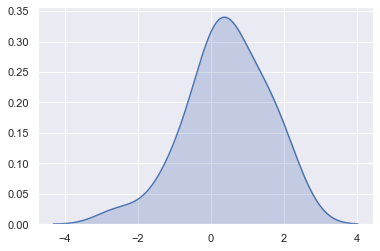

In [7]:
sns.kdeplot(x, shade = True)

**bandwidth에 따른 KDE 변화**
- 대역폭(bandwith) h는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용
- 작은 h 값(h = 1.0)은 좁고 뾰족한 KDE를 갖게 되며, 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합(over-fitting)하기 쉽다
- 매우 큰 h 값(h = 10)은 과도하게 평활화된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며, 결과적으로 과소적합(under-fitting)하기 쉽다 

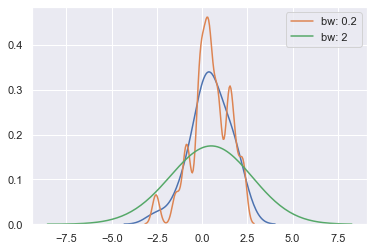

In [8]:
sns.kdeplot(x)
sns.kdeplot(x, bw = 0.2, label = "bw: 0.2")  # 그래프를 보면, Overfitting된 것을 확인할 수 있다
sns.kdeplot(x, bw = 2, label = "bw: 2")      # 그래프를 보면, Underfitting된 것을 확인할 수 있다
plt.legend()

### 사이킷런을 이용한 Mean Shift 
- Mean Shift 군집화는 주로 "컴퓨터 비전(특히 영상 처리)" 분야에서 많이 사용한다
- 별도의 군집화 개수를 지정해주지 않고, 데이터 분포도에 기반하여 자동으로 군집화 개수를 정한다
- 대역폭(bandwith) h의 크기에 따라 군집 중심점의 개수가 지정되므로, 대역폭(bandwith) h의 크기에 따른 군집화 영향도가 매우 크다는 단점이 있다

**make_blobs( )를 이용하여 2개의 feature와 3개의 군집 중심점을 가지는 임의의 데이터 200개를 생성하고 MeanShift를 이용하여 군집화 수행**

In [9]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, 
                  cluster_std = 0.8, random_state = 0)

# 일반적으로 bandwith 값을 작게 할수록 군집 개수가 많아진다
# 결과를 보면, 지나치게 세분화되어 군집화된 것을 알 수 있다
meanshift= MeanShift(bandwidth = 0.9)  # bandwith 를 0.9로 설정
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5 6 7]


**커널 함수의 bandwidth크기를 1로 약간 증가 후에 Mean Shift 군집화 재 수행**

In [10]:
meanshift= MeanShift(bandwidth = 1)  # bandwith 를 1 로 설정
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


**최적의 bandwidth값을 estimate_bandwidth( )로 계산 한 뒤에 다시 군집화 수행**
- 사이킷런은 최적화된 bandwith 값을 찾기 위해서, estimate_bandwidth( ) 함수를 제공
- estimate_bandwidth( ) 함수의 파라미터로 피처 데이터 세트를 입력!

In [11]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile = 0.25)  # 데이터가 많을 경우, quantile(분위수) 값을 키워줘야 함
print('최적화된 bandwidth 값:', round(bandwidth, 3))

최적화된 bandwidth 값: 1.689


**estimate_bandwidth( )로 측정된 bandwidth를 평균 이동 입력 값으로 적용해, 동일한 make_blobs( ) 데이터 세트에 군집화를 수행**

In [12]:
import pandas as pd

clusterDF = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile = 0.25)

meanshift = MeanShift(best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))    

cluster labels 유형: [0 1 2]


**위에서 구성된 3개의 군집을 시각화**

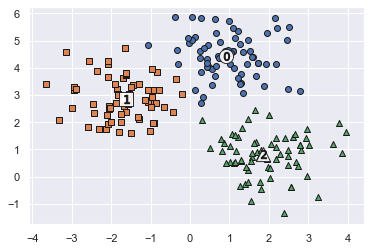

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
# cluster_centers_ 속성으로 군집 중심 좌표를 표시
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label'] == label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor = 'k', 
                marker = markers[label])
    
    # 군집별 중심 시각화
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 200, color = 'white',
                edgecolor = 'k', alpha = 0.9, marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color = 'k', edgecolor = 'k', 
                marker = '$%d$' % label)
    
plt.show()

**실제 데이터와 비교해서 얼마나 군집화가 잘 수행되었는지 확인**
- 즉, target 값과 군집 label 값을 비교 --> target 값과 군집 label 값이 1:1로 잘 매칭되었다!!

In [14]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  65
        2                   1
Name: meanshift_label, dtype: int64
